# Анализ системы метрик приложения Procrastinate Pro+

Дата: 14.08.2025

Приложение Procrastinate Pro+ предоставляет пользователям доступ к развлекательному контенту: видео, подкастам и блогам. Пользователи могут выбрать несколько пакетов контента. Пакеты различаются по цене, объёму и содержанию.

К началу лета в приложении появился новый вид контента — спортивный. С его помощью менеджеры стремятся расширить аудиторию, добавив в неё пользователей, которые увлекаются спортом и здоровым образом жизни.

К запуску нового контента была скорректирована маркетинговая стратегия привлечения пользователей. Согласно бизнес-модели продукта, привлечение должно окупиться за первые 28 дней (4 недели).

После запуска нового контента и изменения стратегии интерес к продукту в целом вырос, но выручка начала стагнировать. Нужно разобраться, почему это происходит.

### Задачи:
- провести анализ юнит-экономики продукта в динамике за первые 28 дней;
- разобраться в причинах стагнации выручки;
- определить, какие источники привлечения приносят прибыль, а какие не выходят на уровень окупаемости;
- дать рекомендации отделу маркетинга.


### Данные

В распоряжении есть данные о посещениях приложения, покупках и расходах на маркетинг.
Данные собраны в трёх датасетах.

1. Датасет `ppro_visits.csv` — информация о посещениях приложения пользователями, которые зарегистрировались с 1 апреля 2024 года по 30 ноября 2024 года:
    - `user_id` — уникальный идентификатор пользователя;
    - `region` — страна пользователя;
    - `device` — категория устройства пользователя;
    - `channel` — идентификатор рекламного источника, из которого пришёл пользователь;
    - `session_start` — дата и время начала сессии;
    - `session_end` — дата и время окончания сессии.

2. Датасет `ppro_orders.csv` — информация о покупках:
    - `user_id` — уникальный идентификатор пользователя, который сделал покупку;
    - `event_dt` — дата и время покупки;
    - `revenue` — выручка.

3. Датасет `ppro_costs.csv` — информация о затратах на маркетинг:
    - `dt` — дата
    - `channel` — идентификатор рекламного источника;
    - `costs` — затраты на этот рекламный источник в этот день.
    
### План проекта
- Загрузить и предобработать данные.
- Подготовить данные для когортного анализа.
- Рассчитать и проанализировать метрики вовлечённости в продукт.
- Рассчитать и проанализировать финансовые метрики CAC, LTV и ROI за первые 28 дней с момента привлечения.
- Исследовать метрики в разрезе источника привлечения.
- Рассчитать период окупаемости маркетинговых вложений.
- Сформулировать выводы и рекомендации.


## Загрузка и предобработка данных

### Загрузка библиотек и данных

In [1]:
# Загружаем библиотеку Pandas
import pandas as pd

In [2]:
from datetime import datetime, timedelta

In [3]:
# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

In [4]:
# задаем карту цветов
cmap = mcolors.LinearSegmentedColormap.from_list('green_red', ['#FF3333', '#FFFF66', '#4C9900', '#006600'], N=20)

In [5]:
# Уменьшение разрешения DPI для графиков 
plt.rcParams['figure.dpi'] = 72

In [6]:
path = "datasets/"
array_files=['ppro_visits.csv', 'ppro_orders.csv', 'ppro_costs.csv'] 

In [7]:
try:
#пробуем загрузить 
    df_visits = pd.read_csv(path + array_files[0])
    display(f'Файл {array_files[0]} успешно загружен  в датафрейм df_visits') 
except:
    # если не получилось
    display(f'Ошибка при загрузке файла')     

'Файл ppro_visits.csv успешно загружен  в датафрейм df_visits'

In [8]:
try:
#пробуем загрузить 
    df_orders = pd.read_csv(path + array_files[1])
    display(f'Файл {array_files[1]} успешно загружен  в датафрейм df_orders') 
except:
    # если не получилось
    display(f'Ошибка при загрузке файла')     

'Файл ppro_orders.csv успешно загружен  в датафрейм df_orders'

In [9]:
try:
#пробуем загрузить 
    df_costs = pd.read_csv(path + array_files[2])
    display(f'Файл {array_files[2]} успешно загружен  в датафрейм df_costs') 
except:
    # если не получилось
    display(f'Ошибка при загрузке файла')     

'Файл ppro_costs.csv успешно загружен  в датафрейм df_costs'

Смотрим структуру данных и сами данные.

In [10]:
display(df_visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161865 entries, 0 to 161864
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        161865 non-null  int64 
 1   region         161865 non-null  object
 2   device         161865 non-null  object
 3   channel        161865 non-null  object
 4   session_start  161865 non-null  object
 5   session_end    161865 non-null  object
dtypes: int64(1), object(5)
memory usage: 7.4+ MB


None

In [11]:
display(df_visits.head())

,user_id,region,device,channel,session_start,session_end
0,631105188566,India,desktop,MediaTornado,2024-04-01 03:48:00,2024-04-01 04:19:00
1,892885906464,India,tv,RocketSuperAds,2024-04-01 00:47:00,2024-04-01 01:14:00
2,517003690029,India,mobile,MediaTornado,2024-04-01 17:31:00,2024-04-01 17:53:00
3,185156659289,India,mobile,MediaTornado,2024-04-01 14:36:00,2024-04-01 14:51:00
4,409503040345,India,mobile,RocketSuperAds,2024-04-01 08:25:00,2024-04-01 08:45:00


Датафрейм <b>df_visits</b> содержит <b>6</b> столбцов и <b>161865</b> строк. Данные соответствуют заявленным и содержат информацию о сессиях пользователя в приложении. Пропуски в данных отсутствуют.

In [12]:
display(df_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33893 entries, 0 to 33892
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   33893 non-null  int64  
 1   event_dt  33893 non-null  object 
 2   revenue   33893 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 794.5+ KB


None

In [13]:
display(df_orders.head())

,user_id,event_dt,revenue
0,771951256319,2024-04-01 05:56:26,2.99
1,829942381059,2024-04-01 14:55:02,2.99
2,727879856738,2024-04-01 22:15:09,14.99
3,481270888930,2024-04-01 06:05:14,2.99
4,844695029762,2024-04-01 01:19:52,2.99


Датафрейм <b>df_orders</b> содержит <b>3</b> столбца и <b>33893</b> строки. Данные соответствуют заявленным и содержат информацию о маркетинговых затратах по разным каналам привлечения по дням. Пропуски в данных отсутствуют.

In [14]:
display(df_costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       976 non-null    object 
 1   channel  976 non-null    object 
 2   costs    976 non-null    float64
dtypes: float64(1), object(2)
memory usage: 23.0+ KB


None

In [15]:
display(df_costs.head())

,dt,channel,costs
0,2024-04-01,FaceBoom,124.938874
1,2024-04-02,FaceBoom,88.147779
2,2024-04-03,FaceBoom,120.779457
3,2024-04-04,FaceBoom,98.981253
4,2024-04-05,FaceBoom,109.044760


Датафрейм <b>df_costs</b> содержит <b>3</b> столбца и <b>976</b> строк. Данные соответствуют заявленным и содержат информацию о покупках пользователя в приложении. Пропуски в данных отсутствуют.

### Предобработка данных

Все столбцы загруженных датафреймов, содержащие даты, имеют тип 'object'. Преобразуем их к дате.

In [16]:
df_visits['session_start'] = pd.to_datetime(df_visits['session_start']).dt.date

In [17]:
df_visits['session_start'] = pd.to_datetime(df_visits['session_start'])

In [18]:
df_visits['session_end'] = pd.to_datetime(df_visits['session_end'])

In [19]:
df_orders['event_dt'] = pd.to_datetime(pd.to_datetime(df_orders['event_dt']).dt.date)

In [20]:
df_costs['dt'] = pd.to_datetime(df_costs['dt'])

Проверим на полные дубликаты

In [21]:
#Проверим на наличие явных дубликатов в данных по всем столбцам
display(f'Явных дубликатов по всем столбцам: {df_visits.duplicated().sum()}.\
        Это {df_visits.duplicated().sum()/df_visits.shape[0]} %')

'Явных дубликатов по всем столбцам: 0.        Это 0.0 %'

In [22]:
#Проверим на наличие явных дубликатов в данных по всем столбцам
display(f'Явных дубликатов по всем столбцам: {df_orders.duplicated().sum()}.\
        Это {df_orders.duplicated().sum()/df_orders.shape[0]} %')

'Явных дубликатов по всем столбцам: 0.        Это 0.0 %'

In [23]:
#Проверим на наличие явных дубликатов в данных по всем столбцам
display(f'Явных дубликатов по всем столбцам: {df_costs.duplicated().sum()}.\
        Это {df_costs.duplicated().sum()/df_orders.shape[0]} %')

'Явных дубликатов по всем столбцам: 0.        Это 0.0 %'

In [24]:
# Проверим на дубликаты пользователь + день покупки
display(df_orders.duplicated(subset=['user_id', 'event_dt']).sum())

np.int64(0)

## Подготовка данных к когортному анализу

Подготовим данные к когортному анализу с учётом того, что будем изучать окупаемость привлечения пользователей за первые 28 дней.

Для каждого пользователя найдем:
- дату первой сессии (дата привлечения пользователя, `first_dt`);
- канал привлечения (`first_channel`);
- стоимость привлечения пользователя (`cac`).

Результаты сохраним в новой таблице, например, `profiles`.

Добавим к данным с событиями и покупками информацию о первом источнике привлечения и дату привлечения пользователя из созданной таблицы. После этого рассчитаем дневной лайфтайм для каждого события или покупки и добавим в таблицу в виде целого числа. В дальнейшем при проведении когортного анализа будем использлвать информацию о первом источнике привлечения пользователя.

### Определение даты привлечения пользователя 

In [25]:
# Находим дату первой сессии (дата привлечения пользователя)
df_visits['first_dt'] = pd.to_datetime(df_visits.groupby('user_id')['session_start'].transform('min').dt.date)

In [26]:
# Добавми месяц привлечения 
df_visits['first_month'] = df_visits['first_dt'].dt.month 

### Определение канала привлечения пользователя

In [27]:
# Отсортируем данные для корректного определения первого источника привлечения
df_visits = df_visits.sort_values(by=['user_id', 'session_start'])

In [28]:
# Находим канал привлечения (first_channel);
df_visits['first_channel'] = df_visits.groupby(['user_id','session_start'])['channel'].head(1)

In [29]:
# Проверим - все ли получилось
display(df_visits.head())

,user_id,region,device,channel,session_start,session_end,first_dt,first_month,first_channel
31184,26034876,India,tv,FaceBoom,2024-05-29,2024-05-29 10:51:00,2024-05-29,5,FaceBoom
48234,69890364,India,mobile,RocketSuperAds,2024-06-28,2024-06-28 07:30:00,2024-06-28,6,RocketSuperAds
37241,75610104,India,mobile,FaceBoom,2024-06-09,2024-06-09 07:00:00,2024-06-09,6,FaceBoom
127860,76692397,India,mobile,FaceBoom,2024-10-21,2024-10-21 01:59:00,2024-10-21,10,FaceBoom
43967,80224421,India,mobile,FaceBoom,2024-06-21,2024-06-21 12:17:00,2024-06-21,6,FaceBoom


In [30]:
# Выбираем данные пользователя, только одну строку - удалим дубликаты по ID пользователя
profiles = df_visits.drop_duplicates(subset=['user_id'])

In [31]:
# выбираем нужные столбцы
profiles = profiles[['user_id','first_channel','first_dt','first_month']]

In [32]:
# Добавляем номер недели привлечения
profiles.loc[:, 'first_week'] = profiles['first_dt'].dt.to_period('W').dt.to_timestamp()

In [33]:
display(profiles.head())

,user_id,first_channel,first_dt,first_month,first_week
31184,26034876,FaceBoom,2024-05-29,5,2024-05-27
48234,69890364,RocketSuperAds,2024-06-28,6,2024-06-24
37241,75610104,FaceBoom,2024-06-09,6,2024-06-03
127860,76692397,FaceBoom,2024-10-21,10,2024-10-21
43967,80224421,FaceBoom,2024-06-21,6,2024-06-17


Получили profiles - профиль - список уникальных пользователей с датой первого посещения и каналом привлечения.

In [34]:
display(f'Всего уникальных пользователей: {profiles.shape[0]} человек')

'Всего уникальных пользователей: 74856 человек'

### Определение САС для пользователя

Считаем маркетинговые затраты на пользователя. Добавим к данным пользователя - стоимость его привлечения. Объединим данные по дате привлечения и каналу.

In [35]:
# Проверим на дубликаты затраты дата+ канал
display(df_costs.duplicated(subset=['dt', 'channel']).sum())

np.int64(0)

In [36]:
# Объединяем профиль пользователя с общими затратами по кналу и дате
profiles = pd.merge(profiles, df_costs , left_on= ['first_dt', 'first_channel'],
                    right_on = ['dt', 'channel'], how = 'left')

In [37]:
#Считаем количество пользователей, привлеченных в каждый день
df_work = profiles.groupby(['first_dt', 'first_channel'])['user_id'].nunique().reset_index()

In [38]:
# Объединим данные с данными по пользователю
profiles = pd.merge(profiles, df_work, on = ['first_dt', 'first_channel'], how='left')

In [39]:
#переименуем столбцы  
profiles = profiles.rename(columns={'user_id_x' :'user_id', 'user_id_y':'All_users_dt', 'costs': 'All_dt_costs'})

In [40]:
#Считаем стоимость CAC на пользователя
profiles['CAC'] = profiles['All_dt_costs']/profiles['All_users_dt']

In [41]:
display(profiles.head())

,user_id,first_channel,first_dt,first_month,first_week,dt,channel,All_dt_costs,All_users_dt,CAC
0,26034876,FaceBoom,2024-05-29,5,2024-05-27,2024-05-29,FaceBoom,85.792484,90,0.953250
1,69890364,RocketSuperAds,2024-06-28,6,2024-06-24,2024-06-28,RocketSuperAds,36.295000,60,0.604917
2,75610104,FaceBoom,2024-06-09,6,2024-06-03,2024-06-09,FaceBoom,120.812103,101,1.196159
3,76692397,FaceBoom,2024-10-21,10,2024-10-21,2024-10-21,FaceBoom,138.903998,121,1.147967
4,80224421,FaceBoom,2024-06-21,6,2024-06-17,2024-06-21,FaceBoom,148.704623,123,1.208981


Получили таблицу profiles - cписок пользователей с данными по каналу, дате привлечения и стоимости привлечения. 

### Ограничение по дате

Т.к. когортный анализ идет по месячным когортам, а данные за ноябрь - неполные, то исключаем из дальнейшего анализа пользователей, привлеченных в ноябре. 

In [42]:
profiles = profiles.loc[profiles['first_month'] < 11 ]

In [43]:
display(f'Всего уникальных пользователей после ограничения по дате: {profiles.shape[0]} человек')

'Всего уникальных пользователей после ограничения по дате: 64555 человек'

Ограничим, соответственно, таблицы с визитами, заказами и затратами

In [44]:
df_visits = df_visits.loc[pd.to_datetime(df_visits['session_start']).dt.month < 11 ]

In [45]:
df_orders = pd.merge(df_orders, profiles['user_id'], on='user_id', how='inner')

In [46]:
df_costs = df_costs.loc[pd.to_datetime(df_costs['dt']).dt.month < 11 ]

### Объединение данных о пользователях и покупках

In [47]:
# Обогащаем данные о покупках данными из профиля пользователя  
df = pd.merge(df_orders, profiles, on ='user_id', how='left')

In [48]:
display(df.head())

,user_id,event_dt,revenue,first_channel,first_dt,first_month,first_week,dt,channel,All_dt_costs,All_users_dt,CAC
0,771951256319,2024-04-01,2.99,FaceBoom,2024-04-01,4,2024-04-01,2024-04-01,FaceBoom,124.938874,133,0.939390
1,829942381059,2024-04-01,2.99,FaceBoom,2024-04-01,4,2024-04-01,2024-04-01,FaceBoom,124.938874,133,0.939390
2,727879856738,2024-04-01,14.99,FaceBoom,2024-04-01,4,2024-04-01,2024-04-01,FaceBoom,124.938874,133,0.939390
3,481270888930,2024-04-01,2.99,TipTop,2024-04-01,4,2024-04-01,2024-04-01,TipTop,54.200101,73,0.742467
4,844695029762,2024-04-01,2.99,FaceBoom,2024-04-01,4,2024-04-01,2024-04-01,FaceBoom,124.938874,133,0.939390


In [49]:
# Определяем количество дней, прошедших с момента первого посещения (дневной лайфтайм)
df['N_day'] = (df['event_dt'] - df['first_dt']).dt.days

In [50]:
# Преобразуем дни в целое число
df['N_day'] = df['N_day'].astype(int)

In [51]:
# Для расчета некоторых показателей добавим месяц события
df['event_dt_month'] = df['event_dt'].dt.month

### Выбор данных c покупками за первые 28 дней с момента первой сессии

In [52]:
#Выбираем пользователей с покупками (или их отсутствием) за первые 28 дней с момента первого посещения
# 27 - т.к. есть нулевой день
df_orders_28 = df.loc[df['N_day'] <=27]

**Вывод**: Подготовлен датафрейм **df_orders_28**, содержащий данные о покупках пользователя за первые 28 дней, его первом посещении и канале привлечения, и маркетинговых затратах на пользователя. 

## Анализ месячной динамики основных метрик продукта

**Задача 1**. Начнем анализ данных с изучения динамики активности пользователей и их вовлечённости в продукт. Рассчитаем по всем данным значения DAU, MAU и Stickiness и визуализируем их. Активными считаем всех пользователей, которые взаимодействовали с приложением.

**Задача 2**. В разрезе каждого месяца привлечения новых пользователей рассчитаем:
- Среднюю стоимость привлечения пользователя (CAC).
- Значение LTV и ROI с учётом покупок, совершённых за 28 дней с момента привлечения.

Здесь и далее при расчёте LTV и ROI учитываем всех привлечённых пользователей когорты.

Визуализируем метрики и сформулируем промежуточный вывод.

###  Изучение динамики активности пользователей и их вовлечённости в продукт

#### DAU по всем данным

In [53]:
# Группируем по дате начала сессии и считаем уникальных пользователей
dau_all = df_visits.groupby('session_start')['user_id'].nunique().reset_index()

In [54]:
#переименуем столбец 'user_id' в 'DAU'
dau_all = dau_all.rename(columns={'user_id': 'DAU'})

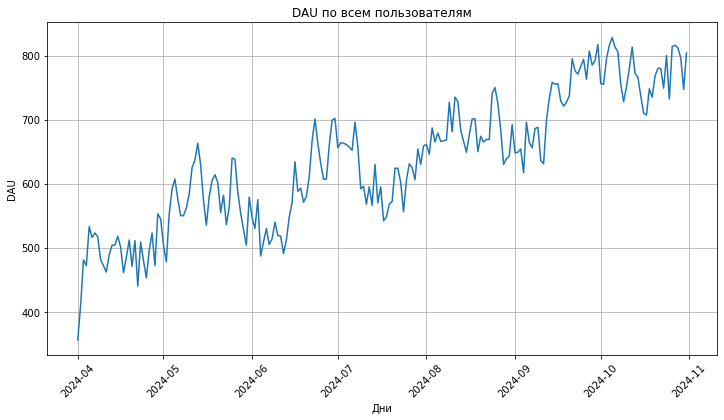

In [55]:
# Строим график DAU
plt.subplots(figsize=(12,6)) 
plt.plot(
    dau_all['session_start'],
    dau_all['DAU'])

plt.title('DAU по всем пользователям')
plt.xlabel('Дни') 
plt.ylabel('DAU') 
plt.xticks(rotation=45)  
plt.grid()
plt.show()

**Вывод**: несмотря на колебания, дневная аудитория растет во всем периоде наблюдения.

#### MAU по всем данным

In [56]:
# Рассчитаем месяц начала сессии в отделынй столбец
df_visits['session_start_month'] = df_visits['session_start'].dt.month

In [57]:
# Группируем по месяцу начала сессии и считаем уникальных пользователей
mau_all = df_visits.groupby('session_start_month')['user_id'].nunique().reset_index()

In [58]:
#переименуем столбец 'user_id' в 'MAU'
mau_all = mau_all.rename(columns={'user_id': 'MAU'})

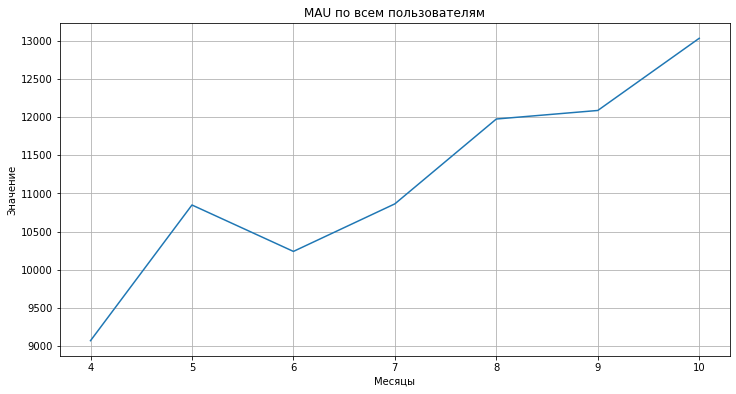

In [59]:
# Строим график MAU
plt.subplots(figsize=(12,6)) 
plt.plot(
    mau_all['session_start_month'],
    mau_all['MAU'])

plt.title('MAU по всем пользователям')
plt.xlabel('Месяцы') 
plt.ylabel('Значение') 
plt.grid()
plt.show()

**Вывод**: небольшое падение аудитории за июнь, но далее - устойчивый рост показателя MAU.

#### Stickiness по всем данным

Формула: Stickness = (Среднемесячный DAU/MAU) x 100%

In [60]:
# Рассчитаем и добавим в таблицу dau_all номер месяца сесии
dau_all['session_start_month'] = dau_all['session_start'].dt.month

In [61]:
# Вычисляем среднемесячный DAU
dau_all = dau_all.groupby('session_start_month')['DAU'].mean().reset_index()

In [62]:
# Объединим таблицы DAU и MAU по номеру месяца
df_stickness_all = pd.merge(dau_all, mau_all, on='session_start_month', how='left')

In [63]:
# Рассчитаем показатель Stickiness
df_stickness_all['Stickiness'] = (df_stickness_all['DAU']/df_stickness_all['MAU']) * 100

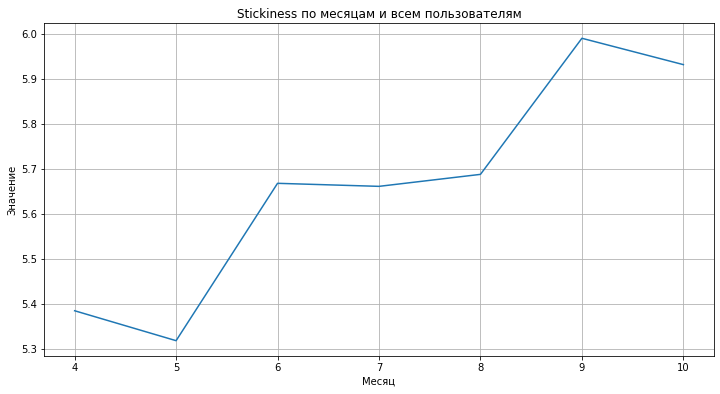

In [64]:
# Строим график Stickiness
plt.subplots(figsize=(12,6)) 
plt.plot(
    df_stickness_all['session_start_month'],
    df_stickness_all['Stickiness'])

plt.title('Stickiness по месяцам и всем пользователям')
plt.xlabel('Месяц') 
plt.ylabel('Значение') 
plt.grid()
plt.show()

**Вывод**: Показатель 'липкости', как важный показатель лояльности и вовлеченности, не падает с мая. Тенденция такая: рост-стабилизация-рост-стабилизация. 

### Показатели по когортам (в разрезе каждого месяца привлечения)

Когорта - пользователи в месяц привлечения.

#### Средний CAC на пользователя по когортам

Используем профиль пользователей, в нем содержатся данные о маркетинговых затратах на каждого пользователя.

In [65]:
CAC_groupped = profiles.groupby(['first_month'])['CAC'].mean().reset_index()

In [66]:
display(CAC_groupped.head())

,first_month,CAC
0,4,0.734706
1,5,0.748572
2,6,0.973978
3,7,1.054344
4,8,1.155601


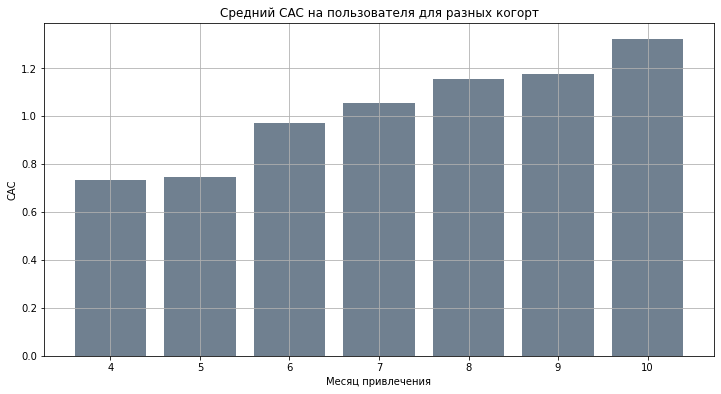

In [67]:
# Визуализируем
plt.figure(figsize=(12, 6))

plt.bar(CAC_groupped['first_month'], CAC_groupped['CAC'], color='slategray' )
    
# Добавим заголовок и подписи осей
plt.title('Средний CAC на пользователя для разных когорт')
plt.xlabel('Месяц привлечения')
plt.ylabel('CAC')
plt.grid(True)
plt.show()

**Вывод**: с июня растут средние маркетинговые затраты на одного пользователя, это согласуется с вводными данными о маркетинговых изменениях в начале лета. Максимум затрат на пользователя - в октябре.

#### Средний LTV  на пользователя  за первые 28 дней после первого посещения по когортам

Считаем LTV для когорты (месяц привлечения) и делим его на общее количество пользователей в когорте.

In [68]:
# Группируем данные по месяцу привлечения и считаем сумму выручки 
LTV_groupped = df_orders_28.groupby('first_month')['revenue'].sum().reset_index()

In [69]:
display(LTV_groupped.head())

,first_month,revenue
0,4,7425.63
1,5,8141.76
2,6,7447.84
3,7,9991.41
4,8,10367.05


In [70]:
# Считаем общее количество пользователей в когорте
df_users = profiles.groupby('first_month')['user_id'].nunique().reset_index()

In [71]:
# Объединяем данные 
LTV_groupped = pd.merge(LTV_groupped, df_users, on='first_month', how='left')

In [72]:
# Считаем LTV на пользователя
LTV_groupped['LTV'] = LTV_groupped['revenue']/LTV_groupped['user_id']

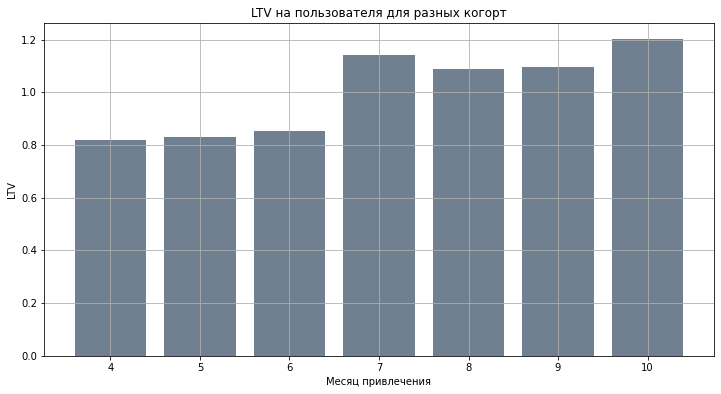

In [73]:
# Визуализируем
plt.figure(figsize=(12, 6))

plt.bar(LTV_groupped['first_month'], LTV_groupped['LTV'], color='slategray' )
    
# Добавим заголовок и подписи осей
plt.title('LTV на пользователя для разных когорт')
plt.xlabel('Месяц привлечения')
plt.ylabel('LTV')
plt.grid(True)
plt.show()

**Вывод**: Средний LTV на пользователя вырос с июля, возможно, на это повлияли маркетинговые изменения. Максимум - в октябре.

#### ROI пользователя по когортам 

Формула: ROI = 100* (когортный LTV - CAC)/CAC 

In [74]:
# Объединим ранее посчитанные CAC и LTV
ROI_groupped = pd.merge(CAC_groupped, LTV_groupped, on = 'first_month', how='left')

In [75]:
display(CAC_groupped.head(10))

,first_month,CAC
0,4,0.734706
1,5,0.748572
2,6,0.973978
3,7,1.054344
4,8,1.155601
5,9,1.178301
6,10,1.323047


In [76]:
display(LTV_groupped.head())

,first_month,revenue,user_id,LTV
0,4,7425.63,9069,0.818793
1,5,8141.76,9789,0.831725
2,6,7447.84,8719,0.854208
3,7,9991.41,8742,1.142920
4,8,10367.05,9518,1.089205


In [77]:
#Рассчитаем ROI на пользователя
ROI_groupped['ROI'] = ((ROI_groupped['LTV']- ROI_groupped['CAC']) / ROI_groupped['CAC']) * 100

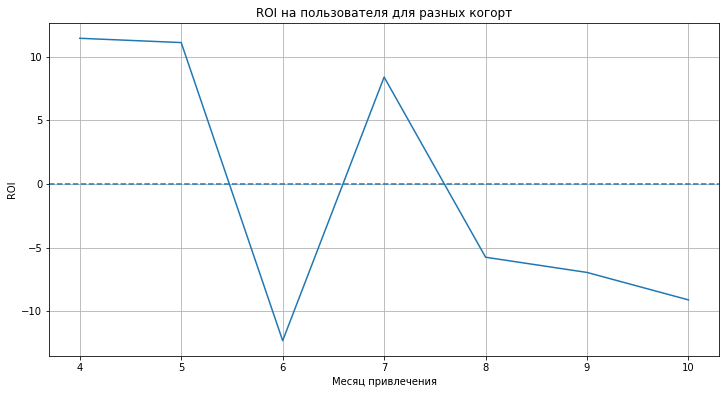

In [78]:
# Визуализируем
plt.figure(figsize=(12, 6))

plt.plot(ROI_groupped['first_month'], ROI_groupped['ROI'])

# Добавим линию, выше которой когорта окупается
plt.axhline(y=0, linestyle='--')

plt.title('ROI на пользователя для разных когорт')
plt.xlabel('Месяц привлечения')
plt.ylabel('ROI')
plt.grid(True)
plt.show()

**Вывод:** по представленным данным ни в одном месяце привлечения за 28 дней вложения в маркетинг не окупаются. По показателю ROI мы видим, что до изменения контента и стратегии привлечения маркетинговые расходы окупались, а после этого (в среднем) - окупаться перестали, за исключением июля, когда произошел резкий рост LTV.

## Анализ метрик в разрезе источника привлечения

Теперь необходимо разобраться, какие источники привлечения перспективны, а какие за 28 дней не окупились.

**Задача 1**. Определим самые популярные источники привлечения:
- Посчитаем общее число привлечённых пользователей для каждого источника.
- Визуализируем динамику набора новых пользователей по дням в каждом источнике.
- Рассчитаем и визуализируем динамику DAU, MAU и Stickiness по источникам привлечения.

**Задача 2**. Изучим динамику изменения метрик на 28-й день в разрезе источника. Проведем анализ с выделением недельных когорт по дате привлечения. Рассчитаем и визуализируем:
- Скользящее удержание на 14-й день с момента привлечения (за период с 14-го по 28-й день).
- Конверсию в покупку.

Недельную динамику затрат на маркетинг по каждому источнику привлечения.
Динамику среднего CAC, значений LTV и ROI.

По результатам проведем анализ рекламных каналов. Дадим общую характеристику каждому рекламному каналу по рассчитанным метрикам.

### Определение популярных источников привлечения

In [79]:
# Определим список каналов привлечения
array_channel = profiles['first_channel'].unique()
display(array_channel)

array(['FaceBoom', 'RocketSuperAds', 'TipTop', 'MediaTornado'],
      dtype=object)

#### Общее количество привлечённых пользователей для каждого источника

Анализируем за весь период, используем profiles.

In [80]:
# Группируем по каналу привлечения и считаем количество уникальных пользователей
df_users_channel = profiles.groupby('first_channel')['user_id'].nunique().reset_index()

In [81]:
# Переименуем столбец 'user_id' в 'N_users'
df_users_channel = df_users_channel.rename(columns={'user_id': 'N_users'})

In [82]:
# Отсортируем количество пользователей в порядке убывания для наглядности
df_users_channel.sort_values(by='N_users', ascending=True, inplace= True)

In [83]:
# Изменим индекс для визуализации
df_users_channel = df_users_channel.set_index('first_channel')

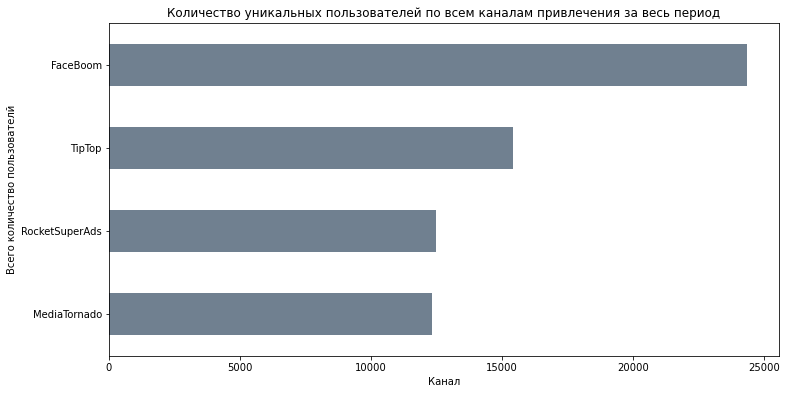

In [84]:
# Визуализируем 
plt.subplots(figsize=(12,6))

df_users_channel['N_users'].plot(kind='barh',
                                title='Количество уникальных пользователей по всем каналам привлечения за весь период',
                                legend=False,
                                ylabel='Всего количество пользователй',
                                xlabel='Канал',
                                rot=0,
                                color='slategray') 

plt.show()         

**Вывод**: Самый большой поток пользователей привлекается по каналу FaceBoom. На втором месте по численности - TipTop. Остальные 2 канала - практически одинаковы по количеству пользователей.

####  Динамика набора новых пользователей по дням в каждом источнике.

Используем profiles.

In [85]:
# Группируем по каналу и дате привлечения и  считаем количесвто уникальных пользователей
df_users_channel = profiles.groupby(['first_channel','first_dt'])['user_id'].nunique().reset_index()

In [86]:
#переименуем столбец '
df_users_channel  = df_users_channel.rename(columns={'user_id': 'N_users'})

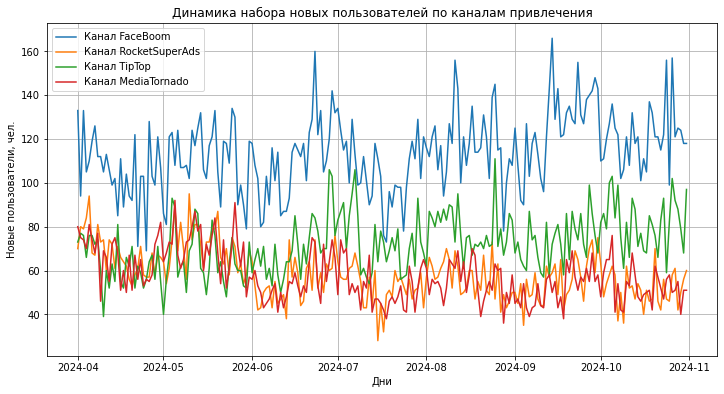

In [87]:
# Строим график по всем каналам привлечения
plt.subplots(figsize=(12,6))

for channel in array_channel:
    df_plot = df_users_channel.loc[df_users_channel['first_channel'] == channel]
    plt.plot(df_plot['first_dt'], df_plot['N_users'], label=f'Канал {channel}')

plt.title('Динамика набора новых пользователей по каналам привлечения')
plt.xlabel('Дни') 
plt.ylabel('Новые пользователи, чел.') 
#plt.xticks(rotation=45)  
plt.grid()
plt.legend()
plt.show()

**Вывод**: Набор новых пользователей идет по всем каналам, во все дни, провалов до 0 - нет.

Лидер привлечения FaceBoom привлекает стабильно больше пользователей, с небольшим ростом в динамике с лета. Второй источник TipTop тоже имеет тенденцию к росту количества привлекаемых пользователей в динамике с лета. Занимающие третье место источники немного снижаются с лета и держатся на одном уровне. Два лидера (FaceBoom и TipTop) привлечения улучшили показатель привлечения с лета. Возможно, изменение стратегии привлечения положительно повлияло на привлечение из этих источников.

Амплитуда говорит о том, что пользователи по всем каналам набираются по дням неравномерно.

####  DAU по каждому источнику привлечения

Используем таблицу посещений df_visits.

In [88]:
# группируем по каналу привлечения и считаем количество уникальных пользователей 
DAU_channel = df_visits.groupby(['first_channel','session_start'])['user_id'].nunique().reset_index()

In [89]:
#переименуем столбец 
DAU_channel  = DAU_channel.rename(columns={'user_id': 'DAU_channel'})

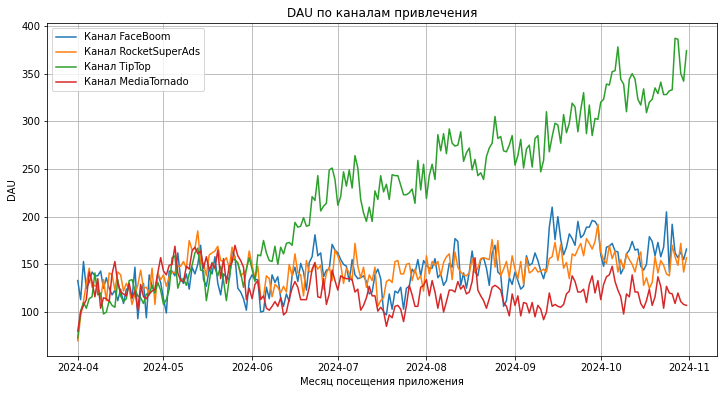

In [90]:
# Строим график по всем каналам привлечения
plt.subplots(figsize=(12,6))

for channel in array_channel:
    df_plot = DAU_channel.loc[DAU_channel['first_channel'] == channel]
    plt.plot(df_plot['session_start'], df_plot['DAU_channel'], label=f'Канал {channel}')

plt.title('DAU по каналам привлечения')
plt.xlabel('Месяц посещения приложения') 
plt.ylabel('DAU') 
plt.grid()
plt.legend()
plt.show()

**Вывод**: Наблюдаем значительный рост показателя DAU по каналу TipTop с июня. Показатель каналов FaceBoom и RocketSuperAds - чуть-чуть подрос летом и стабильн. Показатель MediaTornado летом немного упал.

#### MAU по каждому источнику привлечения

Используем таблицу посещений df_visits.

In [91]:
# группируем по каналу привлечения и месяцу события и считаем количество уникальных пользователей
MAU_channel = df_visits.groupby(['first_channel','session_start_month'])['user_id'].nunique().reset_index()

In [92]:
#переименуем столбец 'user_id' в 'MAU'
MAU_channel  = MAU_channel.rename(columns={'user_id': 'MAU_channel'})

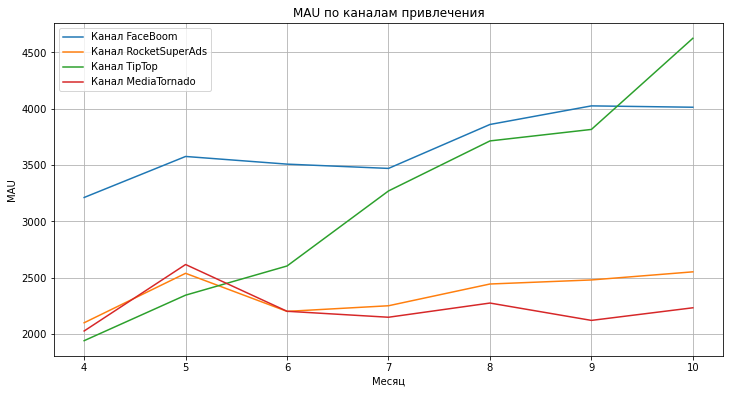

In [93]:
# Строим график MAU по всем каналам привлечения
plt.subplots(figsize=(12,6)) 
for channel in array_channel:
    df_plot = MAU_channel.loc[MAU_channel['first_channel'] == channel]
    plt.plot(df_plot['session_start_month'], df_plot['MAU_channel'], label=f'Канал {channel}')

plt.title('MAU по каналам привлечения')
plt.xlabel('Месяц') 
plt.ylabel('MAU') 
plt.grid()
plt.legend()
plt.show()

**Вывод:** Наблюдаем рост показателя MAU у канала TipTop. Он рос быстрее всех с июня и вышел на 1 место в октябре, обогнав FaceBoom. Показатели канала RocketSuperAds и  MediaTornado упали в июне. RocketSuperAds медленно рос и вренулся осенью к показателям мая, а канал MediaTornado упал и стабилен. 

#### Stickiness по источникам привлечения

Формула: Stickness = (Среднемесячный DAU/MAU) x 100%

In [94]:
#Добавим столбец 'месяц события' в таблицу C DAU
DAU_channel['session_start_month'] = DAU_channel['session_start'].dt.month

In [95]:
# Вычисляем среднемесячный DAU по каналу привлечения
DAU_channel_mean = DAU_channel.groupby(['first_channel', 'session_start_month'])['DAU_channel'].mean().reset_index()

In [96]:
# Объединим таблицы DAU и MAU по номеру месяца и каналу привлечения
stickness_channel = pd.merge(DAU_channel_mean, MAU_channel, on=['first_channel','session_start_month'], how='left')

In [97]:
# Рассчитаем показатель Stickiness
stickness_channel['Stickiness'] = (stickness_channel['DAU_channel']/stickness_channel['MAU_channel']) * 100

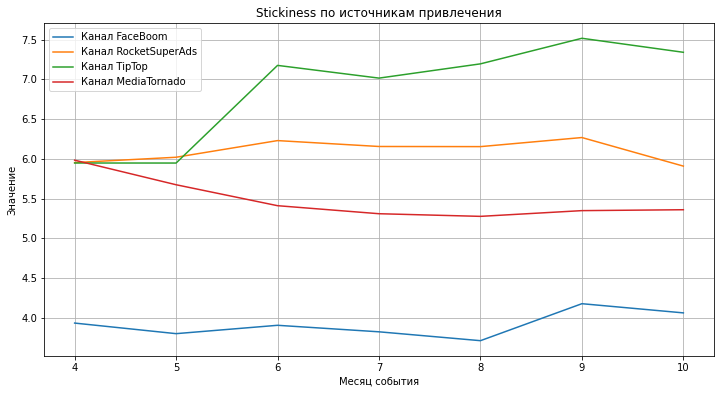

In [98]:
# Строим график Stickiness
plt.subplots(figsize=(12,6))

for channel in array_channel:
    df_plot = stickness_channel.loc[stickness_channel['first_channel'] == channel]
    plt.plot(df_plot['session_start_month'],df_plot['Stickiness'], label=f'Канал {channel}')

plt.title('Stickiness по источникам привлечения')
plt.xlabel('Месяц события') 
plt.ylabel('Значение') 
plt.grid()
plt.legend()
plt.show()

**Вывод**: Наиболее "залипательный" канал - TipTop - несмотря на то, что пользователей там меньше, чем у FaceBoom, он заметно активнее: это видно по высоким значениям DAU и Stickiness. Скорее всего, этот канал приводит более заинтересованную аудиторию.

У FaceBoom ситуация противоположная: по MAU видно, что пользователей много, но DAU и Stickiness остаются низкими. Такое ощущение, что люди приходят, но почти не возвращаются — возможно, канал даёт менее вовлечённый трафик.

### Динамика изменения метрик на 28-й день в разрезе источника

#### Выбор "полных" когорт

Отфильтруем когорты, которым на момент расчёта ещё не исполнилось 28 дней. 

In [99]:
# Проставим номер недели в таблицу с посещениями
df_visits['first_week'] = df_visits['first_dt'].dt.to_period('W').dt.to_timestamp()

In [100]:
#Проставим номер дня сессии относительно даты первого посещения
df_visits['N_day'] = (df_visits['session_start'] - df_visits['first_dt']).dt.days

In [101]:
# Вычисляем максимальный лайфтайм посещения у когорты
cohort_limit = df_visits.groupby(['first_dt'])['N_day'].max().reset_index()

In [102]:
# поучаем список полных когорт
cohort_limit = cohort_limit.loc[cohort_limit['N_day'] >= 28 ]

In [103]:
# Объединяем с посещениями, осталяя только нужные когорты
df_visits_limit = pd.merge(df_visits, cohort_limit['first_dt'], on = 'first_dt', how='inner')

#### Скользящее удержание на 14-й день с момента привлечения (за период с 14-го по 28-й день)


Пользователь может просто заходить в приложение, но ничего не купить, поэтому расчет удержания будем вести по таблице посещений (сессий) df_visits_limit.

In [104]:
# Выберем все сессии пользователей с 14 по 28 день, начиная от даты первого посещения
df_RR = df_visits_limit.loc[(df_visits_limit['session_start'].dt.date >=  
                             df_visits_limit['first_dt'].dt.date + timedelta(days=14)) &
                             (df_visits_limit['session_start'].dt.date <=  df_visits_limit['first_dt'].dt.date +
                             timedelta(days=28))]

In [105]:
# Группируем по неделе привлечения и каналу, посчитаем уникальное количество пользователей
df_RR_groupped = df_RR.groupby(['first_week', 'first_channel'])['user_id'].nunique().reset_index()

In [106]:
# Выберем пользователей на 0 день
df_users_0 = df_visits_limit.loc[df_visits_limit['N_day'] ==0 ]

In [107]:
# Посчитаем количество пользователей по каналу и неделе первого посещения
df_users_0_groupped = df_users_0.groupby(['first_week', 'first_channel'])['user_id'].nunique().reset_index()

In [108]:
# Объединим данные по неделе привлечения и каналу
df_RR_groupped = pd.merge(df_RR_groupped, df_users_0_groupped, on=['first_week', 'first_channel'], how='left' )

In [109]:
# Переименуем столбцы
df_RR_groupped = df_RR_groupped.rename(columns={'user_id_x': 'Retention_users','user_id_y': 'All_users'})

In [110]:
# Считаем показатель
df_RR_groupped['RR'] = (df_RR_groupped['Retention_users']/df_RR_groupped['All_users']) * 100

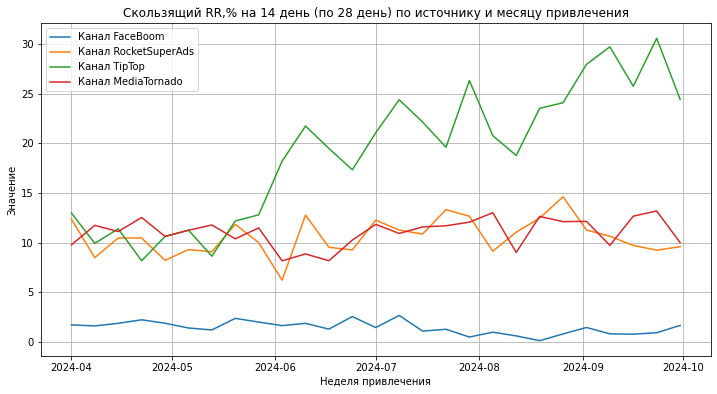

In [111]:
# Строим графики по каналам 
plt.subplots(figsize=(12,6))

for channel in array_channel:
    df_plot = df_RR_groupped.loc[df_RR_groupped['first_channel'] == channel]
    plt.plot(df_plot['first_week'],df_plot['RR'], label=f'Канал {channel}')

plt.title('Скользящий RR,% на 14 день (по 28 день) по источнику и месяцу привлечения')
plt.xlabel('Неделя привлечения') 
plt.ylabel('Значение') 
plt.grid()
plt.legend()
plt.show()

**Вывод**: Самый лучший показатель "удержания" - у канала TipTop. Он значительно вырос с июня, что. вероятно, согласуется с маркетинговыми изменениями с начала лета. Маркетинговые изменения никак не отразились на удержании по остальным трем каналам - они без изменений. Самый низкий показатель - у FaceBoom.

#### Конверсия в покупку на 28 день по каналам и когортам

Целевое действие - покупка. Считаем показатель по таблице df_orders_28, где уже выделены покупки с 1 по 28 день (окно атрибуции). Используем данные только полных когорт, с лайфтайм не меньше 28.

In [112]:
# Объединяем список полных когорт с заказами за 28 дней, оставаляя данные только по полным когортам
df_orders_28_limit = pd.merge(df_orders_28, cohort_limit['first_dt'], on = 'first_dt', how='inner')

In [113]:
# Группируем по месяцу привлечения и каналу, посчитаем уникальное количество пользователей
df_CR_groupped = df_orders_28_limit.groupby(['first_week', 'first_channel'])['user_id'].nunique().reset_index()

Используем посчитанное в п.4.2.1. df_users_0_groupped - количество пользователей на начало недели привлечения по каналам.

In [114]:
# Объединим данные по месяцу привлечения и каналу
df_CR_groupped = pd.merge(df_CR_groupped, df_users_0_groupped, on=['first_week', 'first_channel'], how='left' )

In [115]:
# Переименуем столбцы
df_CR_groupped = df_CR_groupped.rename(columns={'user_id_x': 'Conversion_users','user_id_y': 'All_users'})

In [116]:
# Считаем показатель
df_CR_groupped['CR'] = (df_CR_groupped['Conversion_users']/df_CR_groupped['All_users']) * 100

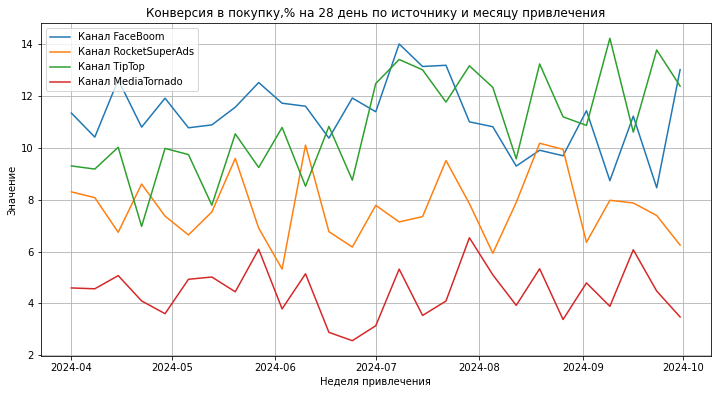

In [117]:
# Строим графики по каналам 
plt.subplots(figsize=(12,6))

for channel in array_channel:
    df_plot = df_CR_groupped.loc[df_CR_groupped['first_channel'] == channel]
    plt.plot(df_plot['first_week'],df_plot['CR'], label=f'Канал {channel}')

plt.title('Конверсия в покупку,% на 28 день по источнику и месяцу привлечения')
plt.xlabel('Неделя привлечения') 
plt.ylabel('Значение') 
plt.grid()
plt.legend()
plt.show()

**Вывод:** С начала лета изменения наблюдаются на каналах TipTop и FaceBoom. Но, если показатель FaceBoom был на 1 месте, то, достигнув макимума в июле, он немного упал. Показатель TipTop в начале лета начал расти и в конце периода вышел на 1 место. 
Возможно, это связано с маркетинговыми изменениями. 
Показатель канала RocketSuperAds имеет большую амплитуду, что позволяет ему в некоторых когортах выходить на 2 место. Это может быть связано с тем, что маркетинговая стратегия хорошо работают в определенные периоды времени или для конкретной целевой аудитории, но имеют проблемы в других когортах.
Самые низкие показатели - у MediaTornado.

#### Недельная динамика затрат на маркетинг по каждому источнику привлечения

Для расчета используем таблицу profiles. Также ограничим, оставим только пользователей полных когорт.

In [118]:
# Объединяем список полных когорт с профилем пользователя, оставляя только пользователей полных когорт
profiles_limit = pd.merge(profiles, cohort_limit['first_dt'], on = 'first_dt', how='inner')

In [119]:
# Группируем по неделе привлечения и каналу, считаем сумарные затраты когорты
df_costs_week = profiles_limit.groupby(['first_week', 'first_channel'])['CAC'].sum().reset_index()

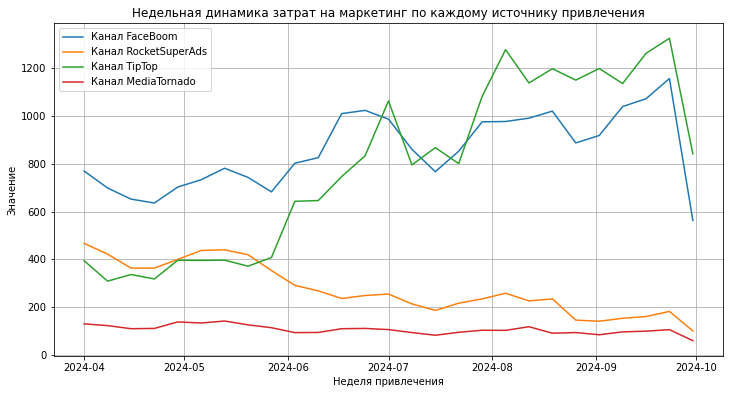

In [120]:
# Строим график 
plt.subplots(figsize=(12,6))

for channel in array_channel:
    df_plot = df_costs_week.loc[df_costs_week['first_channel'] == channel]
    plt.plot(df_plot['first_week'],df_plot['CAC'], label=f'Канал {channel}')

plt.title('Недельная динамика затрат на маркетинг по каждому источнику привлечения')
plt.xlabel('Неделя привлечения') 
plt.ylabel('Значение') 
plt.grid()
plt.legend()
plt.show()

**Вывод:** на графике хорошо видно, что c начала лета выросли маркетинговые затраты на TipTop. К концу периода - там максимальные затраты. Канал MediaTornado вообще не развивается (небольшие вложения на одном уровне). По каналу FaceBoom с лета затраты чуть выросли. Затраты на канал RocketSuperAds с июня упали в 2 раза.

#### Динамика среднего CAC по источникам привлечения

Используем профиль пользователей, в нем содержатся данные о маркетинговых затратах на каждого пользователя. Расчет ведем по "полным" когортам.

In [121]:
# Группируем по неделе привлечения и каналу, считаем средние затраты
df_CAC = profiles_limit.groupby(['first_week', 'first_channel' ])['CAC'].mean().reset_index()

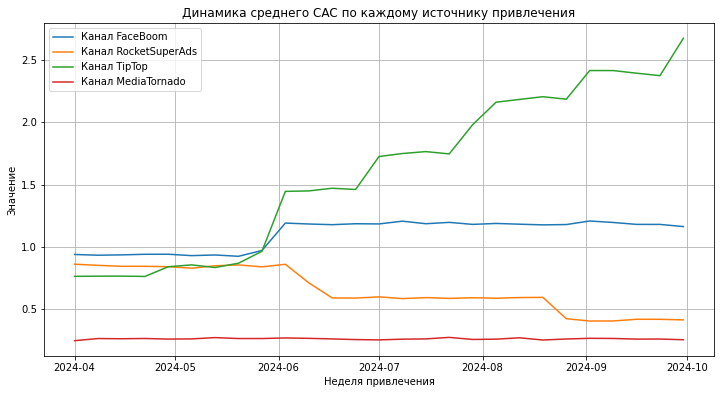

In [122]:
# Строим график 
plt.subplots(figsize=(12,6))

for channel in array_channel:
    df_plot = df_CAC.loc[df_CAC['first_channel'] == channel]
    plt.plot(df_plot['first_week'],df_plot['CAC'], label=f'Канал {channel}')

plt.title('Динамика среднего CAC по каждому источнику привлечения')
plt.xlabel('Неделя привлечения') 
plt.ylabel('Значение') 
plt.grid()
plt.legend()
plt.show()

**Вывод**: Средние затраты на привлечение пользователя по каналу MediaTornado в течение всего периода остаются неизменно низкими, т.к. (мы выяснили ранее) нет финансовых вложений в этот канал. Средний CAC по остальным каналам к началу лета был на одном уровне. Соответственно, после финансовых вливаний в канал TipTop наблюдаем ступенчатый рост среднего САС по этому каналу и плавное падение показателя на канале RocketSuperAds (из-за сокращения затрат на канал). Показатель канала FaceBoom - после небольшого роста с начала лета -  стабилен.

#### Динамика среднего LTV по источникам привлечения

Считаем LTV для когорты (неделя привлечения) и каналу, и делим его на общее количество пользователей в когорте. По "полням когортам".

In [123]:
# Группируем по неделе и каналу, считаем доход
df_LTV = df_orders_28_limit.groupby(['first_week','first_channel'])['revenue'].sum().reset_index()

Используем посчитанное в п.4.2.1. df_users_0_groupped - количество пользователей на начало недели привлечения по каналам.

In [124]:
# Объединим данные по месяцу привлечения и каналу
df_LTV = pd.merge(df_LTV, df_users_0_groupped, on=['first_week', 'first_channel'], how='left' )

In [125]:
# рассчитаем показатель средний LTV
df_LTV['LTV'] = df_LTV['revenue']/df_LTV['user_id']

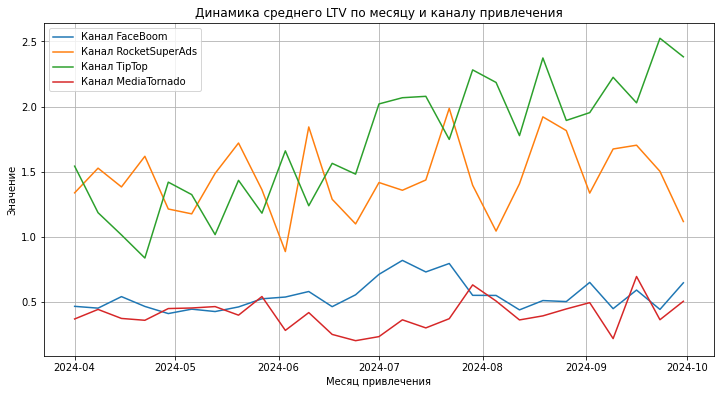

In [126]:
# Строим график 
plt.subplots(figsize=(12,6))

for channel in array_channel:
    df_plot = df_LTV.loc[df_LTV['first_channel'] == channel]
    plt.plot(df_plot['first_week'],df_plot['LTV'], label=f'Канал {channel}')

plt.title('Динамика среднего LTV по месяцу и каналу привлечения')
plt.xlabel('Месяц привлечения') 
plt.ylabel('Значение') 
plt.grid()
plt.legend()
plt.show()

**Вывод:** интересные результаты -  несмотря на сокращение летом маркетинговых затрат на канал, RocketSuperAds стабильно находится на втором месте по среднему LTV на пользователя. На первом месте ожидаемо канал TipTop. Остальные 2 канала - низкие показатели. У канала FaceBoom - небольшой подъем значения в июле, возможно это связано с затратами на привлечение. 

#### Динамика среднего ROI по источникам привлечения

Используем ранее сформированные df_CAC и df_LTV

In [127]:
# Объединим данные
df_ROI = pd.merge(df_CAC, df_LTV, on=['first_week', 'first_channel'], how='left')

In [128]:
# Считаем показатель
df_ROI['ROI'] = ((df_ROI['LTV'] - df_ROI['CAC'])/df_ROI['CAC']) * 100

In [129]:
df_ROI['first_week'] = df_ROI['first_week'].dt.date

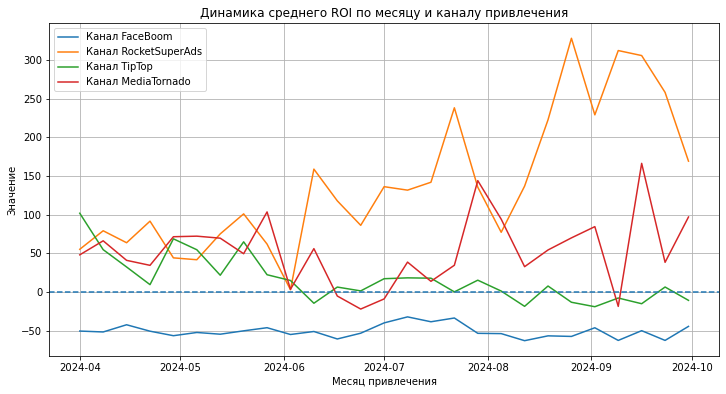

In [130]:
# Визуализируем
plt.subplots(figsize=(12,6))

for channel in array_channel:
    df_plot = df_ROI.loc[df_ROI['first_channel'] == channel]
    plt.plot(df_plot['first_week'],df_plot['ROI'], label=f'Канал {channel}')

# Добавим линию, выше которой когорта окупается
plt.axhline(y=0, linestyle='--')

plt.title('Динамика среднего ROI по месяцу и каналу привлечения')
plt.xlabel('Месяц привлечения') 
plt.ylabel('Значение') 
plt.grid()
plt.legend()
plt.show()

**Вывод**: За 4 недели, начиная от даты первого посещения приложения
1. Стабильно окупается только канал RocketSuperAds. Пользователь этого канала окупается почти во всех когортах, начиная с 10 июня. 
2. Канал MediaTornado окупился в 5 недельных когортах.
3. Каналы FaceBoom и  TipTop - не окупаются и приносят убытки.

## Анализ периода окупаемости маркетинговых вложений

Для источников, которые к 28-му дню не выходят на уровень окупаемости, рассчитаем и визуализируем в виде тепловой карты значения ROI за больший период, например за 8–10 недель.

Разделим данные на недельные когорты по дате привлечения, в качестве интервала наблюдений используем недели.

Стабильно окупатеся только канал RocketSuperAds. Определим список остальных каналов.

In [131]:
array_channel = ['FaceBoom','TipTop', 'MediaTornado']

Из готового датафрейма df из п.2.5. выберем данные о покупках за 10 недель, начиная от первого посещения. 

In [132]:
#Выбираем пользователей с покупками (или их отсутствием) за первые 70 дней с момента первого посещения
# 69 - т.к. есть нулевой день
df_orders_70 = df.loc[df['N_day'] <=69]

### Определяем номер недели для события

In [133]:
#определим номер недели события, начиная от первой недели 
df_orders_70.loc[:, 'N_week'] = df_orders_70['N_day'] // 7

C:\Users\Нина\AppData\Local\Temp\ipykernel_976\567117054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders_70.loc[:, 'N_week'] = df_orders_70['N_day'] // 7


### LTV по когорте

Формула: Доход за период/Количество клиентов в когорте

In [134]:
df_LTV = df_orders_70.groupby(['first_channel', 'first_week', 'N_week'])['revenue'].sum().reset_index()

In [135]:
# Отсортируем данные по N_week, для корректного расчёта LTV при помощи cumsum()
df_LTV = df_LTV.sort_values(by=['first_channel', 'first_week', 'N_week'])

In [136]:
df_LTV['LTV_cum'] = df_LTV.groupby(['first_channel', 'first_week'])['revenue'].cumsum()

Используем посчитанное в п.4.2.1. df_users_0_groupped - количество пользователей по когорте - неделя и каналу.

In [137]:
# Объединим с пользоватлей с LTV
df_LTV = pd.merge(df_LTV, df_users_0_groupped, on=['first_channel','first_week'], how ='left')

In [138]:
# Считаем показатель на пользователя
df_LTV['LTV_user'] = df_LTV['LTV_cum']/df_LTV['user_id']

### САС по когорте

Используем данные из df_CAC из п.4.2.4

In [139]:
# Объединяем с данными по LTV
df_LTV_CAC_ROI = pd.merge(df_LTV, df_CAC, on=['first_week', 'first_channel'], how='left')

### ROI по когорте

In [140]:
df_LTV_CAC_ROI['ROI'] = ((df_LTV_CAC_ROI['LTV_user'] - df_LTV_CAC_ROI['CAC'])/df_LTV_CAC_ROI['CAC']) *100

In [141]:
display(df_LTV_CAC_ROI.head())

,first_channel,first_week,N_week,revenue,LTV_cum,user_id,LTV_user,CAC,ROI
0,FaceBoom,2024-04-01,0,325.03,325.03,820.0,0.396378,0.938873,-57.781507
1,FaceBoom,2024-04-01,1,49.35,374.38,820.0,0.456561,0.938873,-51.371383
2,FaceBoom,2024-04-01,3,5.98,380.36,820.0,0.463854,0.938873,-50.594635
3,FaceBoom,2024-04-01,5,2.99,383.35,820.0,0.467500,0.938873,-50.206261
4,FaceBoom,2024-04-08,0,307.15,307.15,749.0,0.410080,0.933074,-56.050654


### Визуализация ROI

In [142]:
df_LTV_CAC_ROI['first_week'] = df_LTV_CAC_ROI['first_week'].dt.date

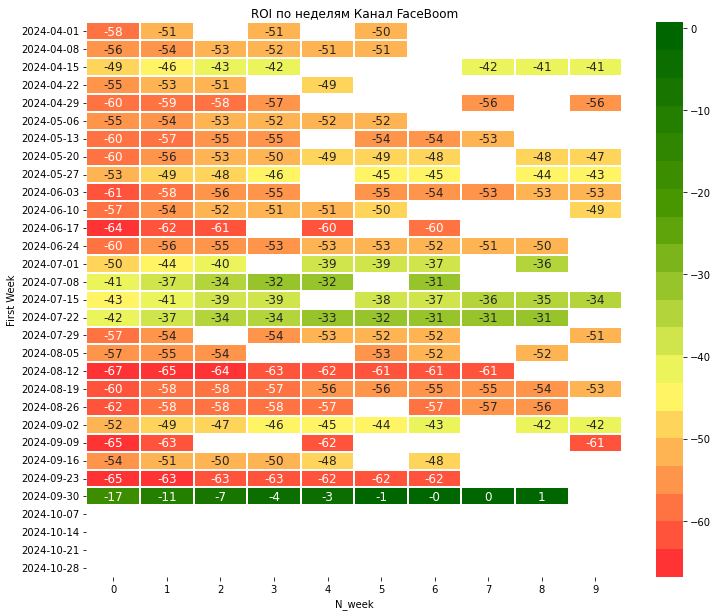

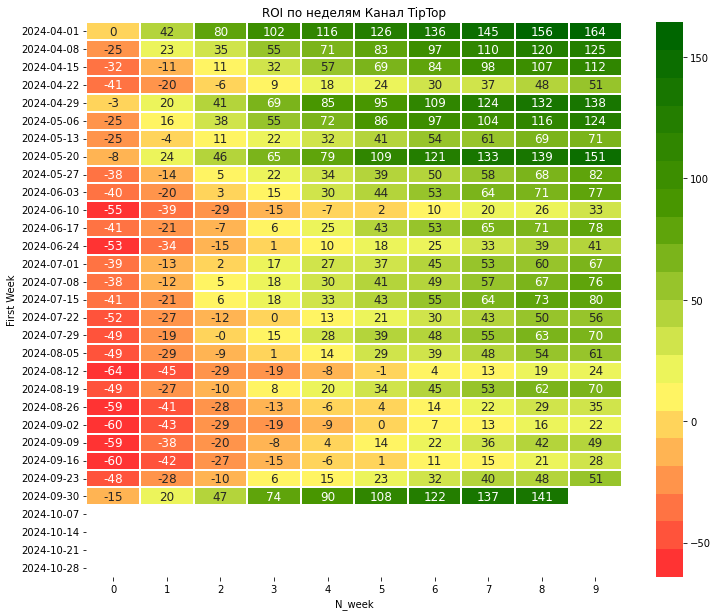

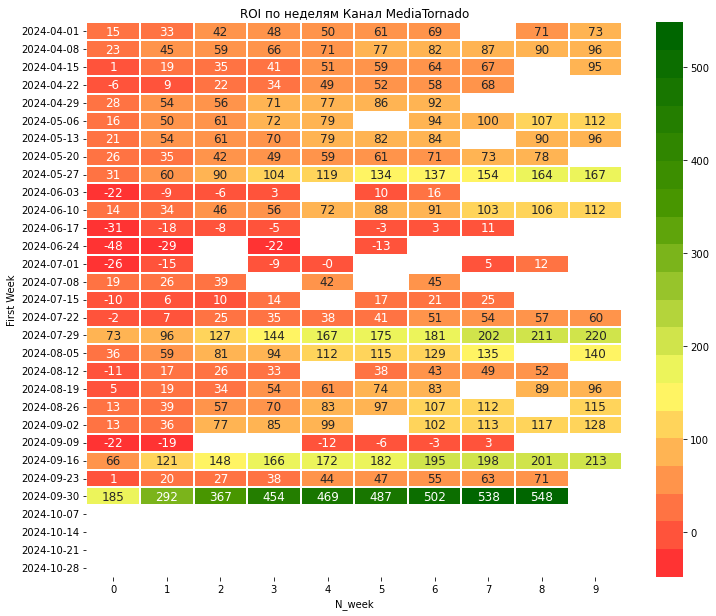

In [143]:
#Визуализируем тепловую карту показателя ROI по каналам
for channel in array_channel:
    # отбираем канал
    df_grouped = df_LTV_CAC_ROI.loc[df_LTV_CAC_ROI['first_channel'] == channel]
         
    # Пивотируем данные, чтобы first_week был индексом, а N_week — столбцом
    df_pivot = df_grouped.pivot(index='first_week', columns='N_week', values='ROI')
    
    # Заменим нули на NaN для корректной отрисовки
    df_pivot[df_pivot == 0] = float('nan')

    # Построим heatmap
    plt.figure(figsize=(12, 10))
    
    sns.heatmap(df_pivot,
              cmap=cmap,
              annot=True,
              fmt='.0f',
              linewidths=2,
              annot_kws={"size": 12})

    plt.title(f'ROI по неделям Канал {channel}')
    plt.xlabel('N_week')
    plt.ylabel('First Week')
    plt.show()


**Вывод:** 
1. Канал **FaceBoom** приносит убытки во всем периоде наблюдения и не окупается ни в одной когорте.
2. Канал **TipTop**, если смотреть относительно начала маркетинговых вливаний, то начиная с когорты 27-05-2024, он не окупается и за 10 недель, хотя до этого окупался и приносил прибыль уже на 6-7 неделе.
3. Канал **MediaTornado**. Его окупаемость - нестабильная, для каких-то когорт окупаемость наступает уже на 2 неделе, для других - на 5-й, у некоторых (за 10 недель) не наступает вообще.

## Выводы и рекомендации

**Выводы:** Проведено исследование показателей юнит-экономики для 4 каналов привлечения приложения Procrastinate Pro+. Согласно бизнес-модели продукта, привлечение должно окупиться за первые 28 дней (4 недели).
 
**Характеристика каналов:**
1. Канал **FaceBoom** - за 4 недели не окупился ни в одной когорте. Показатель ROI - самый худший из всех каналов. Несмотря на то, что аудитория канала - самая многочисленная, самые высокие показатели DAU MAU, но люди приходят, делают покупку, т.к. высокий показатель CR (конверсия в покупку), но не возвращаются- показатели вовлеченности Stickiness и RR - самые низкие среди всех каналов привлечения. Нет долгосрочной вовлеченности. Показатель LTV - низкий.
2. Канал **TipTop** - за 4 недели не окупился ни в одной когорте. Это второй по численности канал привлеченных пользователей, и он заметно активнее - это видно по высоким значениям DAU, Stickiness и RR. Скорее всего, этот канал приводит более заинтересованную аудиторию. С лета выросли и стали лучшими показатели LTV и CR. Но затраты на маркетинг тоже самые большие. Поэтому затраты на привлечение "съедают" всю выгоду от привлечения мотивированных пользователей.
3. Каналы **MediaTornado** и **RocketSuperAds** ,скорее всего, имеют похожую аудиторию. У них одинаковое количество привлеченных пользователей, похожая динамика набора пользователей по дням, похожие показатели DAU и MAU, одинаковый уровень скользящего RR. Но конверсия в покупку значительно лучше у RocketSuperAds.  Канал MediaTornado - не стабилен и окуппается редко, самый лучший показатель - у когорты от 30-09-2024. Маркетинговых затрат почти никаких, но и показатель LTV - низкий 
4. Канал  **RocketSuperAds** - единственный окупаемый канал, приносящий прибыль. Он окупается почти во всех когортах, начиная с 10 июня. Даже при условии того, что маркетинговые затраты с лета по этому каналу были сокращены,  у канала 2 показатель "залипательности", средние показатели RR и конверсии в покупку, но второе по порядку значение LTV. Т.е. пользователи этого канала, не смотря на небольшую аудиторию, стабильно приносят прибыль.

Главный вывод: Причина стагнации выручки - большие маркетинговые затраты на привлечение, которые съедают всю выгоду.

**Рекомендации:** 
1. Отказаться от затрат на привлечение аудитории с канала FaceBoom. Он неэффективен и у пользователей этого канала - нет долгосрочной вовлеченности.
2. Канал TipTop - сократить финансовые затраты на маркетинг, вернуться к финансовым затратам, равным началу перида 20-05-2024, когда канал приносил прибыль на 6 неделе.
3. RocketSuperAds - пользователь этого канала окупается почти во всех когортах, начиная с 10 июня. Даже при условии того, что маркетинговые затраты с лета по этому каналу были сокращены, канал стабильно приносит прибыль. Возможно, стоит увеличить аудиторию этого канала, привлечь новых пользователей и посмотреть на показатели в динамике после привлечения.
4. Канал MediaTornado - в некоторые недели окупается, но и маркетинговых затрат почти никаких. Изучить недели, где показатель ROI был больше 100, возможно, они отличались по контенту от других недель. Можно распределить небольшую сумму на продвижение этого канала и похожего контента, и через месяц посмотреть на результаты окупаемости.
